In [10]:
!pip install plotly

In [34]:
# importing all the packages required for the data analysis
import pandas as pd ## for feautre engineering
import numpy as np  ## for feautre engineering
import matplotlib as mpl ## for plot
import matplotlib.pyplot as plt ## for plot
import seaborn as sns  ## for plot
import datetime, nltk, warnings 
import matplotlib.cm as cm
from sklearn.decomposition import NMF
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import PCA
import lda
from sklearn.decomposition import SparsePCA 
from IPython.display import display, HTML
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math
import plotly.graph_objs as go
color = sns.color_palette()
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline


In [35]:
# read the datafile

# loading the dataset: 
df_initial = pd.read_csv(r'C:\Users\ashukla\Documents\DS\SuperstoreTransaction.csv', encoding="ISO-8859-1",dtype={'OrderID': str})                       



In [36]:


print(df_initial.head(10))
# looking at the shape of the dataset
df_initial.shape

   RowID         OrderID   OrderDate    ShipDate        ShipMode CustomerID  \
0      1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520   
1      2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   CG-12520   
2      3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   DV-13045   
3      4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   SO-20335   
4      5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   SO-20335   
5      6  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   BH-11710   
6      7  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   BH-11710   
7      8  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   BH-11710   
8      9  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   BH-11710   
9     10  CA-2014-115812    6/9/2014   6/14/2014  Standard Class   BH-11710   

      CustomerName    Segment        Country             City  ... PostalCode  \
0      Claire Gute   Consumer  United States     

(9994, 21)

# Finding the missing values in the observations

In [37]:
#____________________________________________________________
# converting OrderDate to datetime
df_initial['OrderDate'] = pd.to_datetime(df_initial['OrderDate'])


In [38]:
#____________________________________________________________
# some info on columns types and find number of columns with null values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))

# displaying the observations with missing values and thier percentage count
display(tab_info)

RowID OrderID       OrderDate ShipDate ShipMode CustomerID  \
column type       int64  object  datetime64[ns]   object   object     object   
null values (nb)      0       0               0        0        0          0   
null values (%)       0       0               0        0        0          0   

                 CustomerName Segment Country    City  ... PostalCode  Region  \
column type            object  object  object  object  ...      int64  object   
null values (nb)            0       0       0       0  ...          0       0   
null values (%)             0       0       0       0  ...          0       0   

                 ProductID Category Sub-Category ProductName    Sales  \
column type         object   object       object      object  float64   
null values (nb)         0        0            0           0        0   
null values (%)          0        0            0           0        0   

                 Quantity Discount   Profit  
column type         int64  float64  float64  
null values (nb)        0        0        0  
null values (%)         0        0        0  

[3 rows x 21 columns]

In [39]:

df_initial.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', df_initial.shape)

#____________________________________________________________
# checking to see if we have removed all observations with missing values
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
# checking the dataset status after dropping the missing values
display(tab_info)

Dataframe dimensions: (9994, 21)


RowID OrderID       OrderDate ShipDate ShipMode CustomerID  \
column type       int64  object  datetime64[ns]   object   object     object   
null values (nb)      0       0               0        0        0          0   
null values (%)       0       0               0        0        0          0   

                 CustomerName Segment Country    City  ... PostalCode  Region  \
column type            object  object  object  object  ...      int64  object   
null values (nb)            0       0       0       0  ...          0       0   
null values (%)             0       0       0       0  ...          0       0   

                 ProductID Category Sub-Category ProductName    Sales  \
column type         object   object       object      object  float64   
null values (nb)         0        0            0           0        0   
null values (%)          0        0            0           0        0   

                 Quantity Discount   Profit  
column type         int64  float64  float64  
null values (nb)        0        0        0  
null values (%)         0        0        0  

[3 rows x 21 columns]

In [48]:

# Checking the stastics of the dataset
display(df_initial.describe())

RowID    PostalCode         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [49]:
print('Duplicate Entries: {}'.format(df_initial.duplicated().sum()))
df_initial[(df_initial.OrderID == 0) & (df_initial.OrderDate == 0) & (df_initial.Quantity == 2) ]

Duplicate Entries: 0


Empty DataFrame
Columns: [RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, Country, City, State, PostalCode, Region, ProductID, Category, Sub-Category, ProductName, Sales, Quantity, Discount, Profit]
Index: []

[0 rows x 21 columns]

In [50]:
# dropping values with duplicate entries
df_initial.drop_duplicates(inplace = True) 

df_initial.shape

(9994, 21)

# Exploring Individual Features:

In [63]:
temp = df_initial[['CustomerID', 'OrderID', 'State']].groupby(['CustomerID', 'OrderID', 'State']).count()
temp = temp.reset_index(drop = False)
countries = temp['State'].value_counts()
print('The Online Retail Company covers : {} states'.format(len(states)))

data = dict(type='choropleth',
locations = states.index,
locationmode = 'USA-states', z = states,
text = states.index, colorbar = {'title':' Number of Orders'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
layout = dict(title='Number of orders per state',
geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

The Online Retail Company covers : 49 states


In [64]:
df_CA = df_initial[df_initial.State == 'California']
df_CA.shape

(2001, 21)

# Number of Unique Customers and products and Transactions

In [66]:

print(pd.DataFrame([{'products': len(df_CA['ProductID'].value_counts()),    
               'transactions': len(df_CA['OrderID'].value_counts()),
               'customers': len(df_CA['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity']))

          products  transactions  customers
quantity      1204          1021        577


# 2. Order Number

In [67]:

temp = df_CA.groupby(by=['CustomerID', 'OrderID'], as_index=False)['OrderDate'].count()
nb_products_per_basket = temp.rename(columns = {'OrderDate':'Number of products'})
nb_products_per_basket[:4].sort_values('CustomerID')

CustomerID         OrderID  Number of products
0   AA-10315  CA-2014-128055                   2
1   AA-10315  CA-2015-121391                   1
2   AA-10375  CA-2014-130729                   1
3   AA-10375  CA-2014-158064                   1

In [69]:
# State all the invoiceNo that has a C present in it
nb_products_per_basket['order_canceled'] = nb_products_per_basket['OrderID'].apply(lambda x: int('C' in str(x)))
display(nb_products_per_basket[:5])
n1 = nb_products_per_basket['order_canceled'].sum()
n2 = nb_products_per_basket.shape[0]
print('Number of canceled orders: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))


CustomerID         OrderID  Number of products  order_canceled
0   AA-10315  CA-2014-128055                   2               1
1   AA-10315  CA-2015-121391                   1               1
2   AA-10375  CA-2014-130729                   1               1
3   AA-10375  CA-2014-158064                   1               1
4   AA-10645  CA-2016-147137                   4               1

Number of canceled orders: 889/1021 (87.07%) 


# 3. Quantity

In [70]:
display(df_CA.sort_values('CustomerID')[:2])

RowID         OrderID  OrderDate  ShipDate        ShipMode CustomerID  \
2229   2230  CA-2014-128055 2014-03-31  4/5/2014  Standard Class   AA-10315   
2230   2231  CA-2014-128055 2014-03-31  4/5/2014  Standard Class   AA-10315   

     CustomerName   Segment        Country           City  ... PostalCode  \
2229   Alex Avila  Consumer  United States  San Francisco  ...      94122   
2230   Alex Avila  Consumer  United States  San Francisco  ...      94122   

      Region        ProductID         Category Sub-Category  \
2229    West  OFF-BI-10004390  Office Supplies      Binders   
2230    West  OFF-AP-10002765  Office Supplies   Appliances   

                                            ProductName    Sales  Quantity  \
2229            GBC DocuBind 200 Manual Binding Machine  673.568         2   
2230  Fellowes Advanced Computer Series Surge Protec...   52.980         2   

      Discount    Profit  
2229       0.2  252.5880  
2230       0.0   14.8344  

[2 rows x 21 columns]

In [74]:
df_check = df_CA[df_CA['Quantity'] < 0][['CustomerID','Quantity',
                                                   'ProductID','Category','Sales']]
for index, col in  df_check.iterrows():
    if df_CA[(df_CA['Category'] == col[0]) & (df_CA['Quantity'] == -col[1]) 
                & (df_CA['Category'] == col[3])].shape[0] == 0: 
        print(df_check.loc[index])
        display(15*'-'+'>'+' Discounted Products also contribute to Negative Quantity')
        break

In [79]:
df_check = df_CA[(df_CA['Quantity'] < 0) & (df_CA['Category'] != 'Discount')][
                                 ['CustomerID','Quantity','ProductID',
                                  'Category','Sales']]

for index, col in  df_check.iterrows():
    if df_uk[(df_CA['CustomerID'] == col[0]) & (df_CA['Quantity'] == -col[1]) 
                & (df_CA['Category'] == col[3])].shape[0] == 0: 
        print(index, df_check.loc[index])
        print(20*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

In [80]:
df_cleaned = df_CA.copy()

In [81]:
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] 
entry_before_dec2010 = []

for index, col in  df_CA.iterrows():
    if (col['Quantity'] > 0) or col['Category'] == 'Discount': continue        
    df_test = df_uk[(df_uk['CustomerID'] == col['CustomerID']) &
                         (df_uk['Sales']  == col['Sales']) & 
                         (df_uk['OrderDate'] < col['OrderDate']) & 
                         (df_uk['Quantity']   > 0)].copy()
    #_________________________________
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        entry_before_dec2010.append(index)
    #________________________________
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    #______________________________________________________________
    # Various counterparts exist in orders: we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break

In [83]:
# df_cleaned_copy = df_cleaned
df_cleaned[(df_cleaned.CustomerID == 17315) & (df_cleaned.Category == '36 PENCILS TUBE RED RETROSPOT')]

Empty DataFrame
Columns: [RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, Country, City, State, PostalCode, Region, ProductID, Category, Sub-Category, ProductName, Sales, Quantity, Discount, Profit, QuantityCanceled]
Index: []

[0 rows x 22 columns]

In [84]:
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(entry_before_dec2010, axis = 0, inplace = True)

In [87]:
list_special_codes = df_cleaned[df_cleaned['ProductID'].str.contains('^[a-zA-Z]+', regex=True)]
list_special_codes

RowID         OrderID  OrderDate   ShipDate        ShipMode CustomerID  \
2         3  CA-2016-138688 2016-06-12  6/16/2016    Second Class   DV-13045   
5         6  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
6         7  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
7         8  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
8         9  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
...     ...             ...        ...        ...             ...        ...   
9986   9987  CA-2016-125794 2016-09-29  10/3/2016  Standard Class   ML-17410   
9990   9991  CA-2017-121258 2017-02-26   3/3/2017  Standard Class   DB-13060   
9991   9992  CA-2017-121258 2017-02-26   3/3/2017  Standard Class   DB-13060   
9992   9993  CA-2017-121258 2017-02-26   3/3/2017  Standard Class   DB-13060   
9993   9994  CA-2017-119914 2017-05-04   5/9/2017    Second Class   CC-12220   

         CustomerName    Segment        Country         City  ... Region  \
2     Darrin Van Huff  Corporate  United States  Los Angeles  ...   West   
5     Brosina Hoffman   Consumer  United States  Los Angeles  ...   West   
6     Brosina Hoffman   Consumer  United States  Los Angeles  ...   West   
7     Brosina Hoffman   Consumer  United States  Los Angeles  ...   West   
8     Brosina Hoffman   Consumer  United States  Los Angeles  ...   West   
...               ...        ...            ...          ...  ...    ...   
9986     Maris LaWare   Consumer  United States  Los Angeles  ...   West   
9990      Dave Brooks   Consumer  United States   Costa Mesa  ...   West   
9991      Dave Brooks   Consumer  United States   Costa Mesa  ...   West   
9992      Dave Brooks   Consumer  United States   Costa Mesa  ...   West   
9993     Chris Cortes   Consumer  United States  Westminster  ...   West   

            ProductID         Category Sub-Category  \
2     OFF-LA-10000240  Office Supplies       Labels   
5     FUR-FU-10001487        Furniture  Furnishings   
6     OFF-AR-10002833  Office Supplies          Art   
7     TEC-PH-10002275       Technology       Phones   
8     OFF-BI-10003910  Office Supplies      Binders   
...               ...              ...          ...   
9986  TEC-AC-10003399       Technology  Accessories   
9990  FUR-FU-10000747        Furniture  Furnishings   
9991  TEC-PH-10003645       Technology       Phones   
9992  OFF-PA-10004041  Office Supplies        Paper   
9993  OFF-AP-10002684  Office Supplies   Appliances   

                                            ProductName    Sales Quantity  \
2     Self-Adhesive Address Labels for Typewriters b...   14.620        2   
5     Eldon Expressions Wood and Plastic Desk Access...   48.860        7   
6                                            Newell 322    7.280        4   
7                        Mitel 5320 IP Phone VoIP phone  907.152        6   
8     DXL Angle-View Binders with Locking Rings by S...   18.504        3   
...                                                 ...      ...      ...   
9986  Memorex Mini Travel Drive 64 GB USB 2.0 Flash ...   36.240        1   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.960        2   
9991                              Aastra 57i VoIP phone  258.576        2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600        4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.160        2   

      Discount   Profit  QuantityCanceled  
2          0.0   6.8714                 0  
5          0.0  14.1694                 0  
6          0.0   1.9656                 0  
7          0.2  90.7152                 0  
8          0.2   5.7825                 0  
...        ...      ...               ...  
9986       0.0  15.2208                 0  
9990       0.0  15.6332                 0  
9991       0.2  19.3932                 0  
9992       0.0  13.3200                 0  
9993       0.0  72.9480                 0  

[2001 rows x 22 c

In [97]:
df_cleaned['Revenue'] = (df_cleaned.Quantity - df_cleaned.QuantityCanceled)* df_cleaned.Sales
df_cleaned.head(10)

RowID         OrderID  OrderDate   ShipDate        ShipMode CustomerID  \
2       3  CA-2016-138688 2016-06-12  6/16/2016    Second Class   DV-13045   
5       6  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
6       7  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
7       8  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
8       9  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
9      10  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
10     11  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
11     12  CA-2014-115812 2014-06-09  6/14/2014  Standard Class   BH-11710   
18     19  CA-2014-143336 2014-08-27   9/1/2014    Second Class   ZD-21925   
19     20  CA-2014-143336 2014-08-27   9/1/2014    Second Class   ZD-21925   

          CustomerName    Segment        Country           City  ...  \
2      Darrin Van Huff  Corporate  United States    Los Angeles  ...   
5      Brosina Hoffman   Consumer  United States    Los Angeles  ...   
6      Brosina Hoffman   Consumer  United States    Los Angeles  ...   
7      Brosina Hoffman   Consumer  United States    Los Angeles  ...   
8      Brosina Hoffman   Consumer  United States    Los Angeles  ...   
9      Brosina Hoffman   Consumer  United States    Los Angeles  ...   
10     Brosina Hoffman   Consumer  United States    Los Angeles  ...   
11     Brosina Hoffman   Consumer  United States    Los Angeles  ...   
18  Zuschuss Donatelli   Consumer  United States  San Francisco  ...   
19  Zuschuss Donatelli   Consumer  United States  San Francisco  ...   

          ProductID         Category Sub-Category  \
2   OFF-LA-10000240  Office Supplies       Labels   
5   FUR-FU-10001487        Furniture  Furnishings   
6   OFF-AR-10002833  Office Supplies          Art   
7   TEC-PH-10002275       Technology       Phones   
8   OFF-BI-10003910  Office Supplies      Binders   
9   OFF-AP-10002892  Office Supplies   Appliances   
10  FUR-TA-10001539        Furniture       Tables   
11  TEC-PH-10002033       Technology       Phones   
18  OFF-AR-10003056  Office Supplies          Art   
19  TEC-PH-10001949       Technology       Phones   

                                          ProductName     Sales Quantity  \
2   Self-Adhesive Address Labels for Typewriters b...    14.620        2   
5   Eldon Expressions Wood and Plastic Desk Access...    48.860        7   
6                                          Newell 322     7.280        4   
7                      Mitel 5320 IP Phone VoIP phone   907.152        6   
8   DXL Angle-View Binders with Locking Rings by S...    18.504        3   
9                    Belkin F5C206VTEL 6 Outlet Surge   114.900        5   
10           Chromcraft Rectangular Conference Tables  1706.184        9   
11    Konftel 250 ConferenceÂ phoneÂ - Charcoal black   911.424        4   
18                                         Newell 341     8.560        2   
19                            Cisco SPA 501G IP Phone   213.480        3   

   Discount   Profit  QuantityCanceled    Revenue  
2       0.0   6.8714                 0     29.240  
5       0.0  14.1694                 0    342.020  
6       0.0   1.9656                 0     29.120  
7       0.2  90.7152                 0   5442.912  
8       0.2   5.7825                 0     55.512  
9       0.0  34.4700                 0    574.500  
10      0.2  85.3092                 0  15355.656  
11      0.2  68.3568                 0   3645.696  
18      0.0   2.4824                 0     17.120  
19      0.2  16.0110                 0    640.440  

[10 rows x 23 columns]

(961, 4)

CustomerID         OrderID  Basket_Price  OrderDate
1   AA-10315  CA-2015-121391        7.0096 2015-10-04
2   AA-10375  CA-2014-130729       11.1384 2014-10-24
3   AA-10375  CA-2014-158064        5.5755 2014-04-21
4   AA-10645  CA-2016-147137      255.5906 2016-07-04

purchase count of observation in each price_range: [601, 154, 111, 71, 21, 3, 0]


(-1.1135940701441076, 1.100647336944074, -1.11368014118493, 1.1124393604672806)

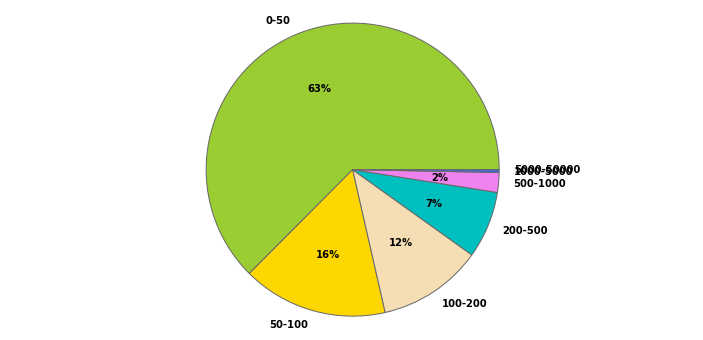

In [99]:
#___________________________________________ 
# Renamed the Revenue column as Basket_Price
temp = df_cleaned.groupby(by=['CustomerID', 'OrderID'], as_index=False)['Profit'].sum()
basket_price = temp.rename(columns = {'Profit':'Basket_Price'})


#_____________________
# Order Date
df_cleaned['OrderDate_int'] = df_cleaned['OrderDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'OrderID'], as_index=False)['OrderDate_int'].mean()
df_cleaned.drop('OrderDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'OrderDate'] = pd.to_datetime(temp['OrderDate_int'])
basket_price.head()


#______________________________________
# selecting entities generating positive revenue  :
basket_price = basket_price[basket_price['Basket_Price'] > 0]

display(basket_price.shape)
display(basket_price.sort_values('CustomerID')[1:5])

#____________________
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['Basket_Price'] < price) &
                       (basket_price['Basket_Price'] > price_range[i-1])]['Basket_Price'].count()
    count_price.append(val)

print('purchase count of observation in each price_range: {}'.format(count_price))
#____________________________________________
# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}-{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')

In [106]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['Category'] == i]
    price_temp = df_temp['Sales'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
#__________________________________________________________________________________________________
df_cleaned[['OrderID','Category', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]
#___________________________________________
# sum of purchases / user & order
temp = df_cleaned.groupby(by=['CustomerID', 'OrderID'], as_index=False)['Profit'].sum()
basket_price = temp.rename(columns = {'Profit':'Basket Price'})
#____________________________________________________________
# percentage of the price of the order / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'OrderID'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp 
#_____________________
# date of the order
df_cleaned['OrderDate_int'] = df_cleaned['OrderDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'OrderID'], as_index=False)['OrderDate_int'].mean()
df_cleaned.drop('OrderDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'OrderDate'] = pd.to_datetime(temp['OrderDate_int'])
#______________________________________
# selection of significant entries:
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

CustomerID         OrderID  Basket Price  categ_0  categ_1  categ_2  \
0   AA-10315  CA-2014-128055      267.4224      0.0      0.0      0.0   
1   AA-10315  CA-2015-121391        7.0096      0.0      0.0      0.0   
2   AA-10375  CA-2014-130729       11.1384      0.0      0.0      0.0   
3   AA-10375  CA-2014-158064        5.5755      0.0      0.0      0.0   
4   AA-10645  CA-2016-147137      255.5906      0.0      0.0      0.0   

   categ_3  categ_4  OrderDate  
0      0.0      0.0 2014-03-31  
1      0.0      0.0 2015-10-04  
2      0.0      0.0 2014-10-24  
3      0.0      0.0 2014-04-21  
4      0.0      0.0 2016-07-04

In [108]:
#________________________________________________________________
# Calculating the Frequency(count) and Monetary(sum)
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

# calculating the Recency(last purchase date) & the First_date of purchase
last_date = basket_price['OrderDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['OrderDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['OrderDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'Recency'] = test2.reset_index(drop = False)['OrderDate']
transactions_per_user.loc[:, 'First Purchase'] = test.reset_index(drop = False)['OrderDate']

transactions_per_user[:5]

# renaming the columns
selected_customers = transactions_per_user.rename(index=str, columns={"count": "Frequency", "sum": "Monetary"})     
selected_customers = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase','categ_0', 'categ_1','categ_2','categ_3','categ_4']]

rfm_data = selected_customers[['CustomerID','Recency','Frequency', 'Monetary','First Purchase']]
product_data = selected_customers[['CustomerID', 'Monetary','categ_0', 'categ_1','categ_2','categ_3','categ_4']]
product_data.head()

CustomerID  Monetary  categ_0  categ_1  categ_2  categ_3  categ_4
0   AA-10315  274.4320      0.0      0.0      0.0      0.0      0.0
1   AA-10375   16.7139      0.0      0.0      0.0      0.0      0.0
2   AA-10645  261.8114      0.0      0.0      0.0      0.0      0.0
3   AB-10060   28.7964      0.0      0.0      0.0      0.0      0.0
4   AB-10165  122.6339      0.0      0.0      0.0      0.0      0.0

# Modelling¶
K-means Clustering:
Why k-means?
As our feature variables are numerical and our goal is unsupervised to find out some sort of structure/grouping in the customers, I used k-means clustering

In [109]:
# selecting features for clustering using RFM 
rfm_clustering = selected_customers[['Recency','Frequency', 'Monetary']]

# selecting features for clustering based on previous purchased products
product_clustering = selected_customers[['categ_0','categ_1', 'categ_2','categ_3','categ_4']]

In [110]:

display(rfm_clustering.describe())

recency = go.Box(
    y= rfm_clustering.Recency,
    name = 'Recency'
    
)
frequency = go.Box(
    y=rfm_clustering.Frequency,
    name = 'Frequency'
    
)
monetary = go.Box(
    y=rfm_clustering.Monetary,
    name = 'Monetary'
)
data =[recency, frequency, monetary]

iplot(data)

Recency   Frequency     Monetary
count   561.000000  561.000000   561.000000
mean    453.884135    1.713012   139.997026
std     380.131757    0.893224   209.547147
min       0.000000    1.000000     1.394400
25%     119.000000    1.000000    21.751500
50%     369.000000    1.000000    68.150800
75%     747.000000    2.000000   161.304600
max    1454.000000    6.000000  2069.619600

In [111]:
# Squre Root Transformation
df_sqrt = rfm_clustering
sqrt_df = df_sqrt.apply(np.sqrt)

In [112]:
matrix = sqrt_df.as_matrix()
scaler = StandardScaler()
scaler.fit(matrix)
print('variables mean values: \n' + 90*'-' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

variables mean values: 
------------------------------------------------------------------------------------------
 [19.10825727  1.26989896  9.71982637]


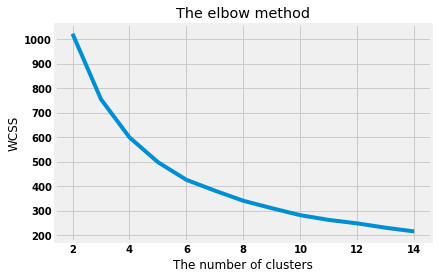

In [113]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 3 The average silhouette_score is : 0.45269904246568493
For n_clusters = 4 The average silhouette_score is : 0.4024767376443312
For n_clusters = 5 The average silhouette_score is : 0.40266964031717023
For n_clusters = 6 The average silhouette_score is : 0.3882613379294762
For n_clusters = 7 The average silhouette_score is : 0.37604373618743875
For n_clusters = 8 The average silhouette_score is : 0.37662822686053893
For n_clusters = 9 The average silhouette_score is : 0.3864363456653557


In [115]:
n_clusters = 5
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.366


In [116]:

pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

2    1    0    4   3
nb. of customers  159  123  113  109  57

In [119]:

rfm_data.loc[:, 'cluster'] = clusters_clients
rfm_data.head()

CustomerID  Recency  Frequency  Monetary  First Purchase  cluster
0   AA-10315      818          2  274.4320            1370        4
1   AA-10375     1163          2   16.7139            1349        2
2   AA-10645       55          2  261.8114             544        0
3   AB-10060      237          1   28.7964             237        1
4   AB-10165      275          3  122.6339            1008        0

In [120]:
# plotting cluster recency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Recency,
    name = 'cluster0_Recency'
)

trace1 = go.Box(
    y=cls1.Recency,
    name = 'cluster1_Recency'
)
trace2 = go.Box(
    y=cls2.Recency,
    name = 'cluster2_Recency'
)
trace3 = go.Box(
    y=cls3.Recency,
    name = 'cluster3_Recency'
)
trace4 = go.Box(
    y=cls4.Recency,
    name = 'cluster4_Recency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [121]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Frequency,
    name = 'cluster0_Frequency'
)

trace1 = go.Box(
    y=cls1.Frequency,
    name = 'cluster1_Frequency'
)
trace2 = go.Box(
    y=cls2.Frequency,
    name = 'cluster2_Frequency'
)
trace3 = go.Box(
    y=cls3.Frequency,
    name = 'cluster3_Frequency'
)
trace4 = go.Box(
    y=cls4.Frequency,
    name = 'cluster4_Frequency'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [122]:
# plotting cluster frequency
cls0 =  rfm_data[rfm_data.cluster == 0]
cls1 =  rfm_data[rfm_data.cluster == 1]
cls2 =  rfm_data[rfm_data.cluster == 2]
cls3 =  rfm_data[rfm_data.cluster == 3]
cls4 =  rfm_data[rfm_data.cluster == 4]

trace0 = go.Box(
    y= cls0.Monetary,
    name = 'cluster0_Monetary'
)

trace1 = go.Box(
    y=cls1.Monetary,
    name = 'cluster1_Monetary'
)
trace2 = go.Box(
    y=cls2.Monetary,
    name = 'cluster2_Monetary'
)
trace3 = go.Box(
    y=cls3.Monetary,
    name = 'cluster3_Monetary'
)
trace4 = go.Box(
    y=cls4.Monetary,
    name = 'cluster4_Monetary'
)

data =[trace0,trace1,trace2,trace3,trace4]

iplot(data)

In [123]:

merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(rfm_data[rfm_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = rfm_data[rfm_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________

print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 561


Recency  Frequency    Monetary  First Purchase  size
cluster                                                         
1.0      207.682927   1.008130   47.096617      209.861789   123
2.0      918.893082   1.006289   61.423954      920.062893   159
4.0      507.155963   2.137615  106.428797      955.100917   109
0.0       99.920354   2.761062  132.674690      828.495575   113
3.0      287.877193   2.315789  638.351932      840.859649    57

In [124]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

KeyError: 1

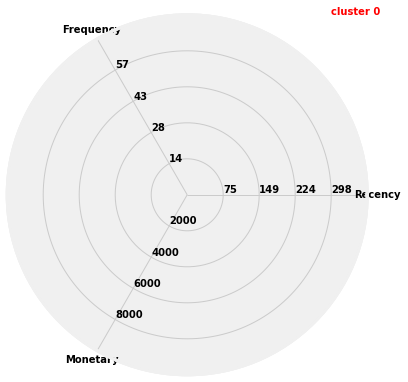

<Figure size 1440x720 with 0 Axes>

In [158]:
fig = plt.figure(figsize=(20,10))

attributes = ['Recency','Frequency', 'Monetary']
ranges = [[0.1, 373], [0.1, 71], [0.01, 10000]]
index  = [0, 1, 2, 3, 4]

n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1

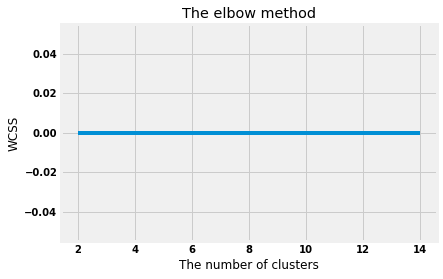

In [159]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(2,15):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(scaled_matrix)
 wcss.append(kmeans.inertia_)

plt.plot(range(2,15), wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()


In [130]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. of customers']).T

0
nb. of customers  561

In [131]:
product_data.loc[:, 'cluster'] = clusters_clients

In [132]:
product_data.head(10)

CustomerID  Monetary  categ_0  categ_1  categ_2  categ_3  categ_4  cluster
0   AA-10315  274.4320      0.0      0.0      0.0      0.0      0.0        0
1   AA-10375   16.7139      0.0      0.0      0.0      0.0      0.0        0
2   AA-10645  261.8114      0.0      0.0      0.0      0.0      0.0        0
3   AB-10060   28.7964      0.0      0.0      0.0      0.0      0.0        0
4   AB-10165  122.6339      0.0      0.0      0.0      0.0      0.0        0
5   AB-10255   96.4914      0.0      0.0      0.0      0.0      0.0        0
6   AB-10600    4.4352      0.0      0.0      0.0      0.0      0.0        0
7   AC-10660   12.5990      0.0      0.0      0.0      0.0      0.0        0
8   AD-10180   80.3404      0.0      0.0      0.0      0.0      0.0        0
9   AF-10870   44.5647      0.0      0.0      0.0      0.0      0.0        0

In [133]:

merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(product_data[product_data['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = product_data[product_data['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('total number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('Monetary')
merged_df

total number of customers: 561


Monetary  categ_0  categ_1  categ_2  categ_3  categ_4  size
cluster                                                               
0.0      139.997026      0.0      0.0      0.0      0.0      0.0   561
NaN             NaN      NaN      NaN      NaN      NaN      NaN     0
NaN             NaN      NaN      NaN      NaN      NaN      NaN     0
NaN             NaN      NaN      NaN      NaN      NaN      NaN     0
NaN             NaN      NaN      NaN      NaN      NaN      NaN     0
NaN             NaN      NaN      NaN      NaN      NaN      NaN     0

In [157]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]
class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)
        fig = plt.figure(figsize=(20,10))
        attributes = ['categ_0','categ_1', 'categ_2','categ_3','categ_4']
ranges = [[0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]
index  = [0, 1, 2, 3, 4, 5]
n_groups = n_clusters ; i_cols = 3
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)
for ind in range(n_clusters):
    ix = ind%3 ; iy = i_rows - ind//3
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
radar = RadarChart(fig, location, sizes, attributes,ranges)
radar.plot(data, color = 'b', linewidth=2.0)
radar.fill(data, alpha = 0.2, color = 'b')
radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')


<Figure size 1440x720 with 0 Axes>